# <b><u> Project Title : Credit Card Default Analysis


# <b> Data Description </b>



### <b>Attribute Information: </b>

### This research employed a binary variable, default payment (Yes = 1, No = 0), as the response variable. This study reviewed the literature and used the following 23 variables as explanatory variables:
* ### X1: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit.
* ### X2: Gender (1 = male; 2 = female).
* ### X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others).
* ### X4: Marital status (1 = married; 2 = single; 3 = others).
* ### X5: Age (year).
* ### X6 - X11: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: X6 = the repayment status in September, 2005; X7 = the repayment status in August, 2005; . . .;X11 = the repayment status in April, 2005. The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above.
* ### X12-X17: Amount of bill statement (NT dollar). X12 = amount of bill statement in September, 2005; X13 = amount of bill statement in August, 2005; . . .; X17 = amount of bill statement in April, 2005.
* ### X18-X23: Amount of previous payment (NT dollar). X18 = amount paid in September, 2005; X19 = amount paid in August, 2005; . . .;X23 = amount paid in April, 2005.

#**Importing Libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
# Importing the dataset

credit_df = pd.read_csv('/content/default of credit card clients (1).csv')

# **Dataset Inspection**

In [3]:
credit_df.head()

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
2,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0


In [4]:
credit_df.shape

(30001, 25)

In [5]:
credit_df.columns

Index(['Unnamed: 0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9',
       'X10', 'X11', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19',
       'X20', 'X21', 'X22', 'X23', 'Y'],
      dtype='object')

In [6]:
credit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30001 entries, 0 to 30000
Data columns (total 25 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  30001 non-null  object
 1   X1          30001 non-null  object
 2   X2          30001 non-null  object
 3   X3          30001 non-null  object
 4   X4          30001 non-null  object
 5   X5          30001 non-null  object
 6   X6          30001 non-null  object
 7   X7          30001 non-null  object
 8   X8          30001 non-null  object
 9   X9          30001 non-null  object
 10  X10         30001 non-null  object
 11  X11         30001 non-null  object
 12  X12         30001 non-null  object
 13  X13         30001 non-null  object
 14  X14         30001 non-null  object
 15  X15         30001 non-null  object
 16  X16         30001 non-null  object
 17  X17         30001 non-null  object
 18  X18         30001 non-null  object
 19  X19         30001 non-null  object
 20  X20   

###**Renaming the Column name**
1.**Renamed the columns using the first record given in the dataset and dropped the first record.**

2.**Renamed our target variable to defaulter and PAY_0 column to PAY_1**

3.**Converted the datatypes of all columns from object to int datatype because all columns contains numerical values.**

4.**Drop the ID column from the dataset,since its not an influential feature in our modeling**

In [7]:
# Renaming the columns in the dataset
credit_df.rename(columns= credit_df.loc[0,:],inplace=True)

In [8]:
# Dropping the first record after renaming the columns
credit_df= credit_df[1:]

In [9]:
#Renaming the column name PAY_0
credit_df.rename(columns={'PAY_0':'PAY_1','default payment next month':'defaulter'},inplace=True)


In [10]:
# Converting the datatype from object to integer in all the columns
credit_df = credit_df.astype(object).astype(int)

In [11]:
credit_df.drop(labels='ID',inplace=True,axis=1)

In [12]:
credit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 1 to 30000
Data columns (total 24 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   LIMIT_BAL  30000 non-null  int64
 1   SEX        30000 non-null  int64
 2   EDUCATION  30000 non-null  int64
 3   MARRIAGE   30000 non-null  int64
 4   AGE        30000 non-null  int64
 5   PAY_1      30000 non-null  int64
 6   PAY_2      30000 non-null  int64
 7   PAY_3      30000 non-null  int64
 8   PAY_4      30000 non-null  int64
 9   PAY_5      30000 non-null  int64
 10  PAY_6      30000 non-null  int64
 11  BILL_AMT1  30000 non-null  int64
 12  BILL_AMT2  30000 non-null  int64
 13  BILL_AMT3  30000 non-null  int64
 14  BILL_AMT4  30000 non-null  int64
 15  BILL_AMT5  30000 non-null  int64
 16  BILL_AMT6  30000 non-null  int64
 17  PAY_AMT1   30000 non-null  int64
 18  PAY_AMT2   30000 non-null  int64
 19  PAY_AMT3   30000 non-null  int64
 20  PAY_AMT4   30000 non-null  int64
 21  PAY_AMT5   3

In [13]:
credit_df.describe()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,defaulter
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


###**The  Dataset Inspection Summary**
1. **The average credit card limit/consumer credit amount is 167484.32(NT Dollars)**
2. **The maximum number of credit card holders were females in Taiwan.**
3. **The given dataset consist of 30000 rows and 24 columns**
4. **The feature 'defaulter'  is our dependent/target feature**
5. **The most number of credit card holders were having university degree education.**
6. **The most of the customers marriage status was Single, who carries a credit card.**



#**Thought Process and Methodolgy**




What actually will drive the customer to default the payment?

Do we think of all the given variables when we are trying to find out a defaulter?
e.g. When we think about the defaulter, do we care about its 'Male or Female'.Do gender has any infulence on our target variable?.

If so, how important would this variable be?
e.g. What is the impact of having that SEX variable? Whether the variable has a postive or negative correlation with our target variable defaulter.

Is this information already described in any other variable?

These are few questions you ask before predicting whether the customer will be defaulter or not -

What is the customer past payment history?

What is his credit limit and whether he is paying the bills in a timely manner?

What is his/her age and educational background?

... Lot more..

**The steps followed in this Classification Project were as follows--**


Data Cleaning

Feature Engineering

Exploratory Data Analysis

Handling Class Imbalance


#**Data Cleaning**

In [14]:
#check for null values
credit_df.isnull().sum()

,0
LIMIT_BAL,0
SEX,0
EDUCATION,0
MARRIAGE,0
AGE,0
PAY_1,0
PAY_2,0
PAY_3,0
PAY_4,0
PAY_5,0


In [15]:
#check for duplicate rows
credit_df.duplicated().sum()

35

In [16]:
#dropping duplicate rows
credit_df = credit_df.drop_duplicates()

In [17]:
credit_df.duplicated().sum()

0

In [18]:
#Check for imbalance data in Target Feature
(credit_df['defaulter'].value_counts()/len(credit_df['defaulter'])*100)

,count
defaulter,
0,77.874187
1,22.125813


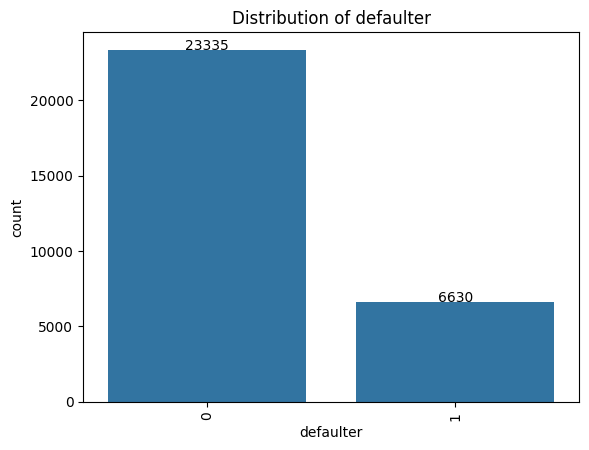

In [19]:
ax = sns.countplot(x=credit_df['defaulter']);
plt.title('Distribution of defaulter')
for p in ax.patches:
    height = p.get_height()
    ax.text(x = p.get_x()+(p.get_width()/2), # x-coordinate position of data label, padded to be in the middle of the bar
    y = height+0.2, ha = 'center',s = '{:.0f}'.format(height)) # data label, formatted to ignore decimals
    #ha = ‘center’) # sets horizontal alignment (ha) to center
plt.xticks(rotation = 'vertical')
plt.show()

###Distribution of target classes is highly imbalanced, non-defaults far outnumber defaults. This is common in these datasets since most people pay credit cards on time

###**Data Cleaning Summary**
1. **Tha given dataset does not contain any missing values**
2. **The given dataset had 35 duplicate rows and we have dropped the duplicate records.**
3. **The target variable consist of imbalance data with 77.87% Non defaulters(0 value) and 22.12% 1 defaulters (1 value).**



#**Feature Engineering**

1.**Replaced 0 class/category in marriage column into class/category 3='others' because 0 class is not defined in the marriage variable.**

2.**Similarly, we replaced few undefined classes like 0, 5 and 6 in education column into class 4='others' using a fuction name education.**

3.**Replaced negative values in payment history columns i.e (PAY_1,PAY_2...PAY_6)
into class 0 -pay duly on time.**

4.**Two new Features were derived from the exisiting independent features,because it will help to train our model more effectively**

###**Replacing few classes in MARRIAGE and EDUCATION variables**

In [20]:
credit_df['MARRIAGE'].unique()

array([1, 2, 3, 0])

In [21]:
credit_df['EDUCATION'].unique()

array([2, 1, 3, 5, 4, 6, 0])

In [22]:
credit_df['MARRIAGE'].replace(to_replace=0,value=3,inplace=True)

<ipython-input-22-6712badc0de4>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  credit_df['MARRIAGE'].replace(to_replace=0,value=3,inplace=True)


In [23]:
def education(value):
  if value> 4:
    value = 4
  elif value==0:
    value= 4
  else:
    value
  return value


In [24]:
credit_df['EDUCATION']= credit_df['EDUCATION'].apply(education)

In [25]:
credit_df['MARRIAGE'].value_counts()

,count
MARRIAGE,
2,15945
1,13643
3,377


In [26]:
credit_df['EDUCATION'].value_counts()

,count
EDUCATION,
2,14019
1,10563
3,4915
4,468


###**Replaced negative values in payment history columns**

In [27]:
payment_list = ['PAY_1','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6']

In [28]:
for var in payment_list:
  credit_df.loc[(credit_df[var] == -1) | (credit_df[var]==-2),var]=0

In [29]:
credit_df.PAY_1.value_counts()

,count
PAY_1,
0,23169
1,3667
2,2666
3,322
4,76
5,26
8,19
6,11
7,9


###**New Features were derived from the exisiting features**

In [30]:
credit_df['Total_Bill_AMT']=credit_df['BILL_AMT1']	+ credit_df['BILL_AMT2']+ credit_df['BILL_AMT3']	+ credit_df['BILL_AMT4']	+ credit_df['BILL_AMT5']	+ credit_df['BILL_AMT6']

In [31]:
credit_df['Total_Paid_AMT']= credit_df['PAY_AMT1']	+ credit_df['PAY_AMT2']+ credit_df['PAY_AMT3']	+ credit_df['PAY_AMT4']	+ credit_df['PAY_AMT5']	+ credit_df['PAY_AMT6']

In [32]:
credit_df['Pending_Payment_AMT']= credit_df['Total_Bill_AMT']- credit_df['Total_Paid_AMT']

In [33]:
credit_df.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'defaulter',
       'Total_Bill_AMT', 'Total_Paid_AMT', 'Pending_Payment_AMT'],
      dtype='object')

#**Exploratory Data Analysis and Visualization**

##**UNIVARIATE ANALYSIS**

##MARRIAGE

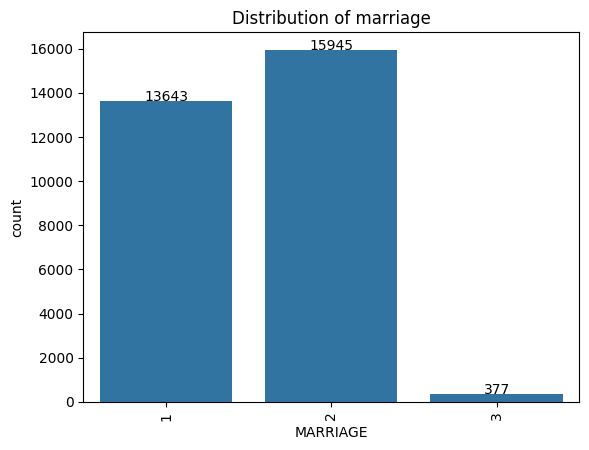

In [34]:
ax = sns.countplot(x=credit_df['MARRIAGE']);
plt.title('Distribution of marriage')
for p in ax.patches:
    height = p.get_height()
    ax.text(x = p.get_x()+(p.get_width()/2), # x-coordinate position of data label, padded to be in the middle of the bar
    y = height+0.2, ha = 'center',s = '{:.0f}'.format(height)) # data label, formatted to ignore decimals
    #ha = ‘center’) # sets horizontal alignment (ha) to center
plt.xticks(rotation = 'vertical')
plt.show()

**From the above graph,we can conclude that the most number of credit card holders were not married(Single)**

##EDUCATION

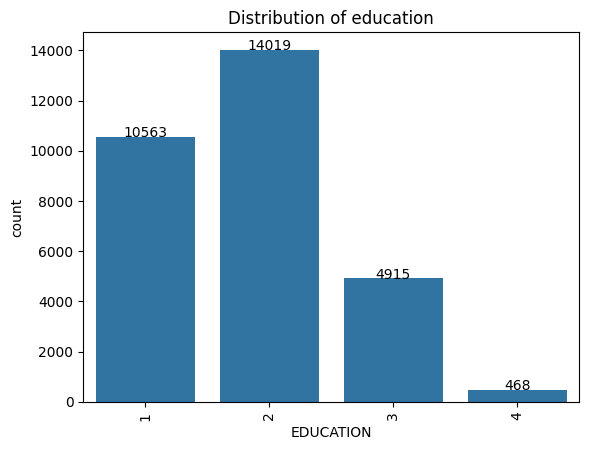

In [35]:
ax = sns.countplot(x=credit_df['EDUCATION']);
plt.title('Distribution of education')
for p in ax.patches:
    height = p.get_height()
    ax.text(x = p.get_x()+(p.get_width()/2), # x-coordinate position of data label, padded to be in the middle of the bar
    y = height+0.2, ha = 'center',s = '{:.0f}'.format(height)) # data label, formatted to ignore decimals
    #ha = ‘center’) # sets horizontal alignment (ha) to center
plt.xticks(rotation = 'vertical')
plt.show()

**The above graph conveys us that the most number of customers were holding  a university degree as their educational qualification followed by graduates degree holders**

##SEX

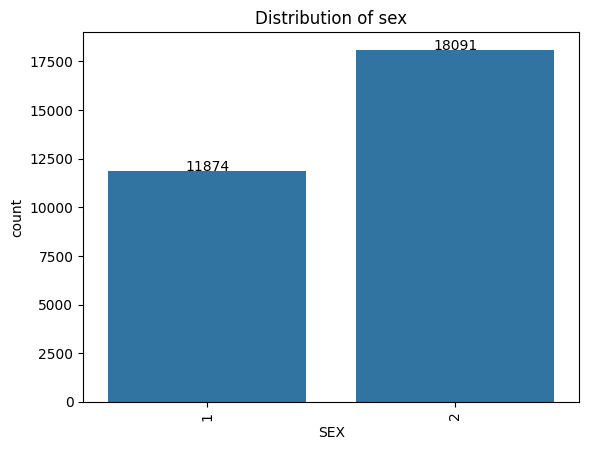

In [36]:
ax = sns.countplot(x=credit_df['SEX']);
plt.title('Distribution of sex')
for p in ax.patches:
    height = p.get_height()
    ax.text(x = p.get_x()+(p.get_width()/2), # x-coordinate position of data label, padded to be in the middle of the bar
    y = height+0.2, ha = 'center',s = '{:.0f}'.format(height)) # data label, formatted to ignore decimals
    #ha = ‘center’) # sets horizontal alignment (ha) to center
plt.xticks(rotation = 'vertical')
plt.show()

**The above figure tells us that the most number of credit card holders in Taiwan were females.**

**Hence proved the famous saying,the females usually do more shopping compared to mens  from the above given data**

##AGE

Text(0.5, 1.0, 'Distribution of Age')

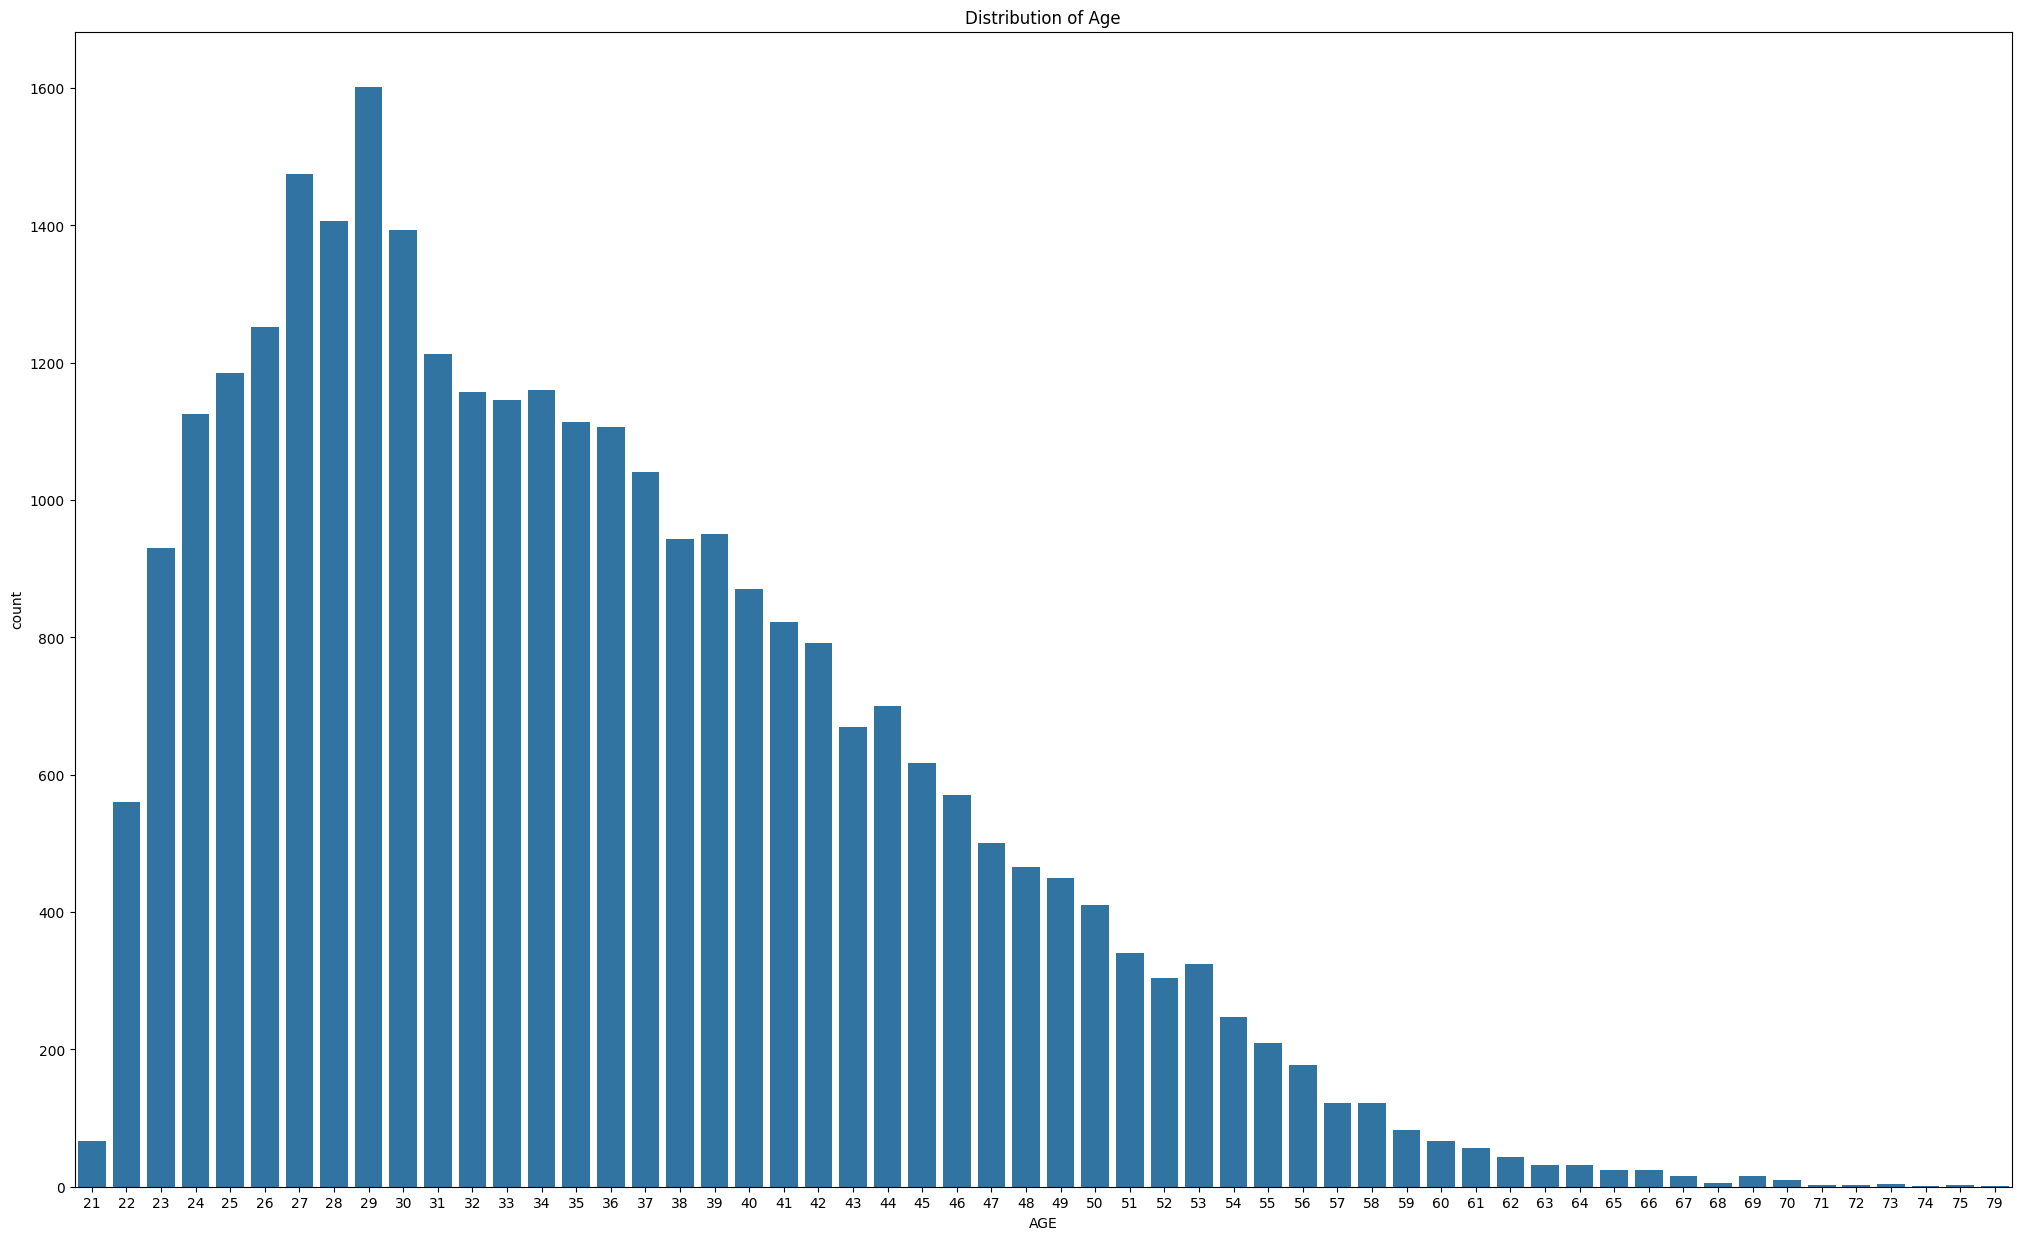

In [37]:
figure, ax = plt.subplots(nrows = 1, ncols=1, figsize = (25,15))
sns.countplot(x = 'AGE', data = credit_df)
plt.title('Distribution of Age')


**The above figure shows the coutplot of Age column**

The most frequent age  of  the credit card holder is between 25-34.

The highest proportion of credit card holders were youth in the age of 29.

Hence we can understand that mostly credit cards were popular among youths of taiwan than the older people.

##Repayment Status (Payment History)

In [38]:
def PayColumnsNames(prefix):
    return [prefix+str(x) for x in range(1,7)]

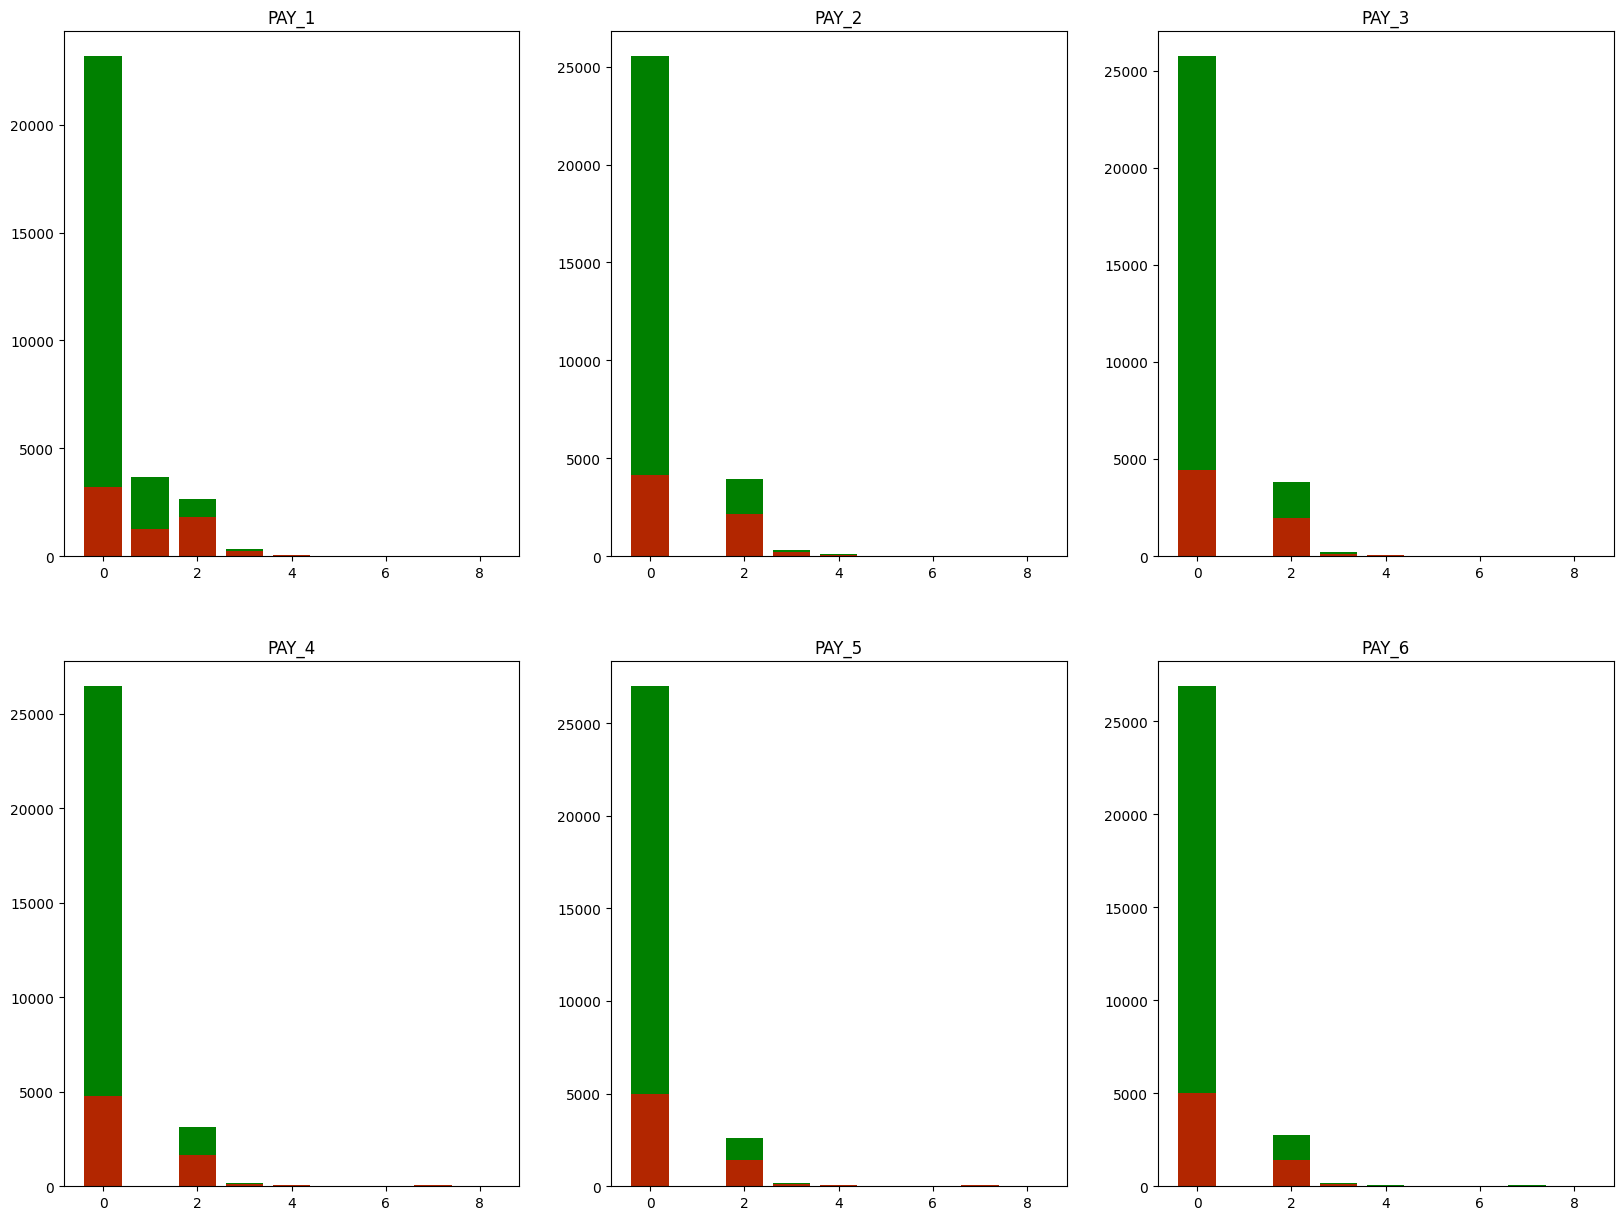

In [39]:
# PAY_1 , PAY_2 , PAY_3 , PAY_4 , PAY_5, PAY_6
pay_columns = PayColumnsNames('PAY_')
figure, ax = plt.subplots(2,3)
figure.set_size_inches(20,15)


for i in range(len(pay_columns)):
    row,col = int(i/3), i%3

    x  = credit_df[pay_columns[i]].value_counts()
    y = credit_df[pay_columns[i]][(credit_df['defaulter']==1)].value_counts()
    ax[row,col].bar(x.index, x, align='center', color='green')
    ax[row,col].bar(y.index, y, align='center', color='red', alpha=0.7)
    ax[row,col].set_title(pay_columns[i])




plt.show()

**The above figure shows the bar plot of payment history status for past six  months starting from September to April , which show the count of defaulters and non-defaulter**

The payment history status consist of unique values like
0- No delay in  payment
2- payment delay of 2 months
4 - payment delay of 4 months
6- payment delay of 6 months
8- payment delay of 8 months

The green bins shows the count of payment status of all the customers (both defaulters and non-defaulters). On the otherhand, the red bins shows the count of payment status explicitly for the customers who were  defaulters.

From the above graph, we can conclude that if the payment status is greater than 2 months,then there is a 90% chance of the customer to default the payment.



##Previous Amount Paid (PAY_AMT)

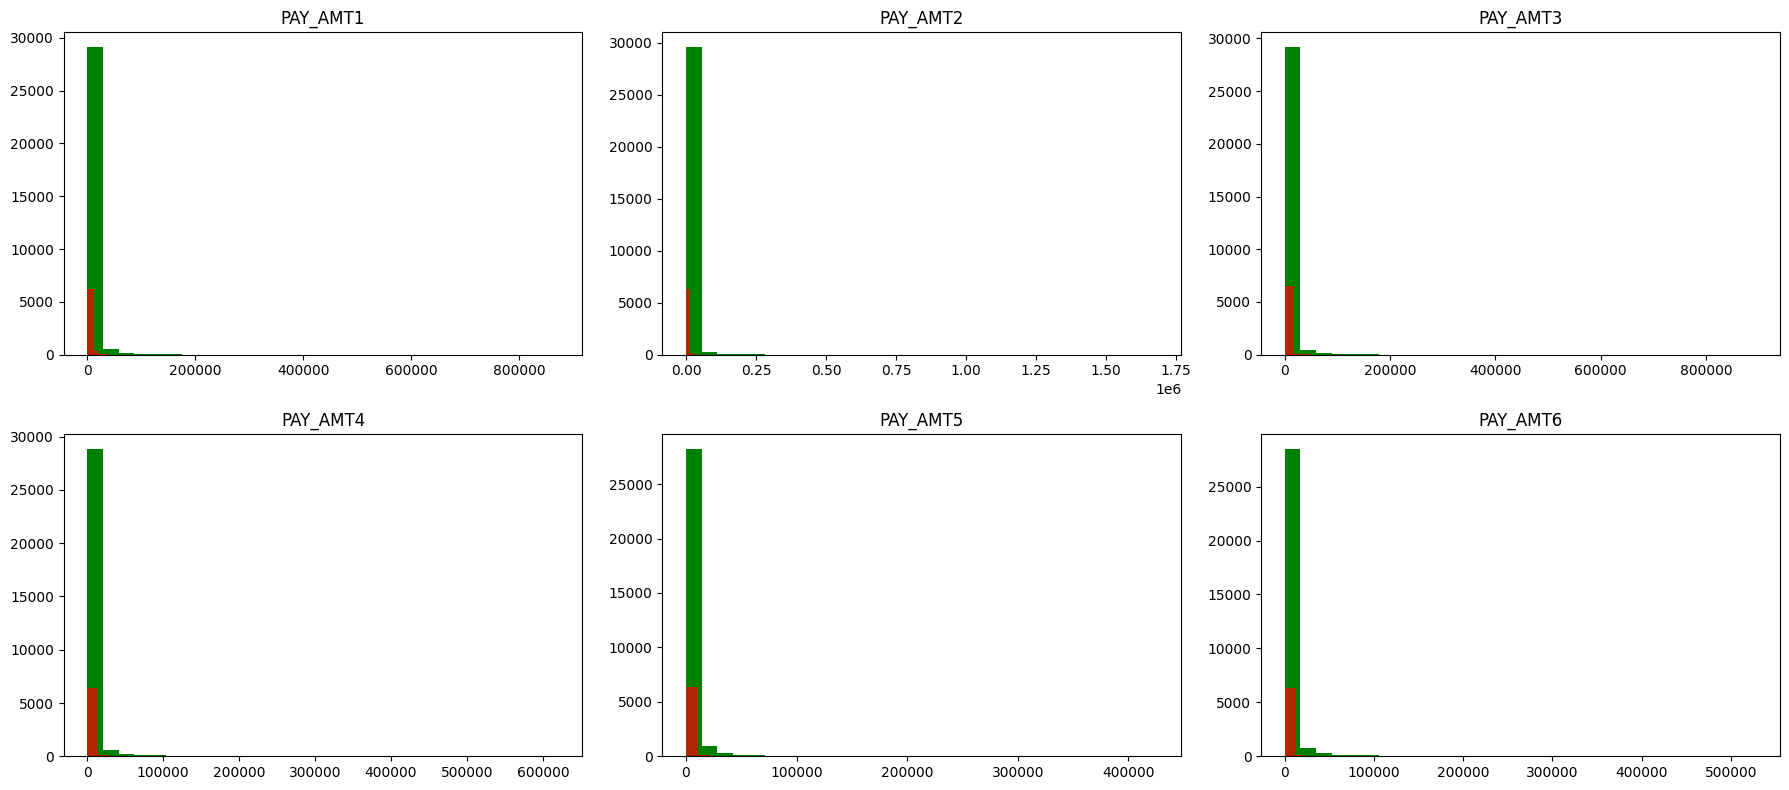

In [62]:
pay_amt_columns = PayColumnsNames('PAY_AMT')
figure, ax = plt.subplots(2,3)
figure.set_size_inches(18,8)


for i in range(len(pay_columns)):
    row,col = int(i/3), i%3

    ax[row,col].hist(credit_df[pay_amt_columns[i]], 30, color ='green')
    ax[row,col].hist(credit_df[pay_amt_columns[i]][(credit_df['defaulter']==1)],30,color='red',alpha = 0.7)
    ax[row,col].set_title(pay_amt_columns[i])
    #adding scaling to make the graph more helpful
    #ax[row,col].set_yscale('log', nonposy='clip')



plt.tight_layout()
plt.show()

**The above histogram shows the distribution of payment amount for each month explicitly for defaulters after scaling the data using log transform**

The green bins in the histograms shows the payment_amount for all the customers from September to April Month.

The red bins in the histogram tells the payment amount of customers who were actually a defaulter from September to April Month.

We can tell from the above histogram that the payment amount of defaulters were relatively very low compared to non defaulters and the defaulters payment amount
was falling down as we from April(PAY_AMT6) to September(PAY_AMT1).

We can conclude from the above plot that PAY_AMT1 variable is a key variable which finally helps us to understand the payment behaviour and gives us insight whether the customer will be defaulter or not.

##Bill Amount

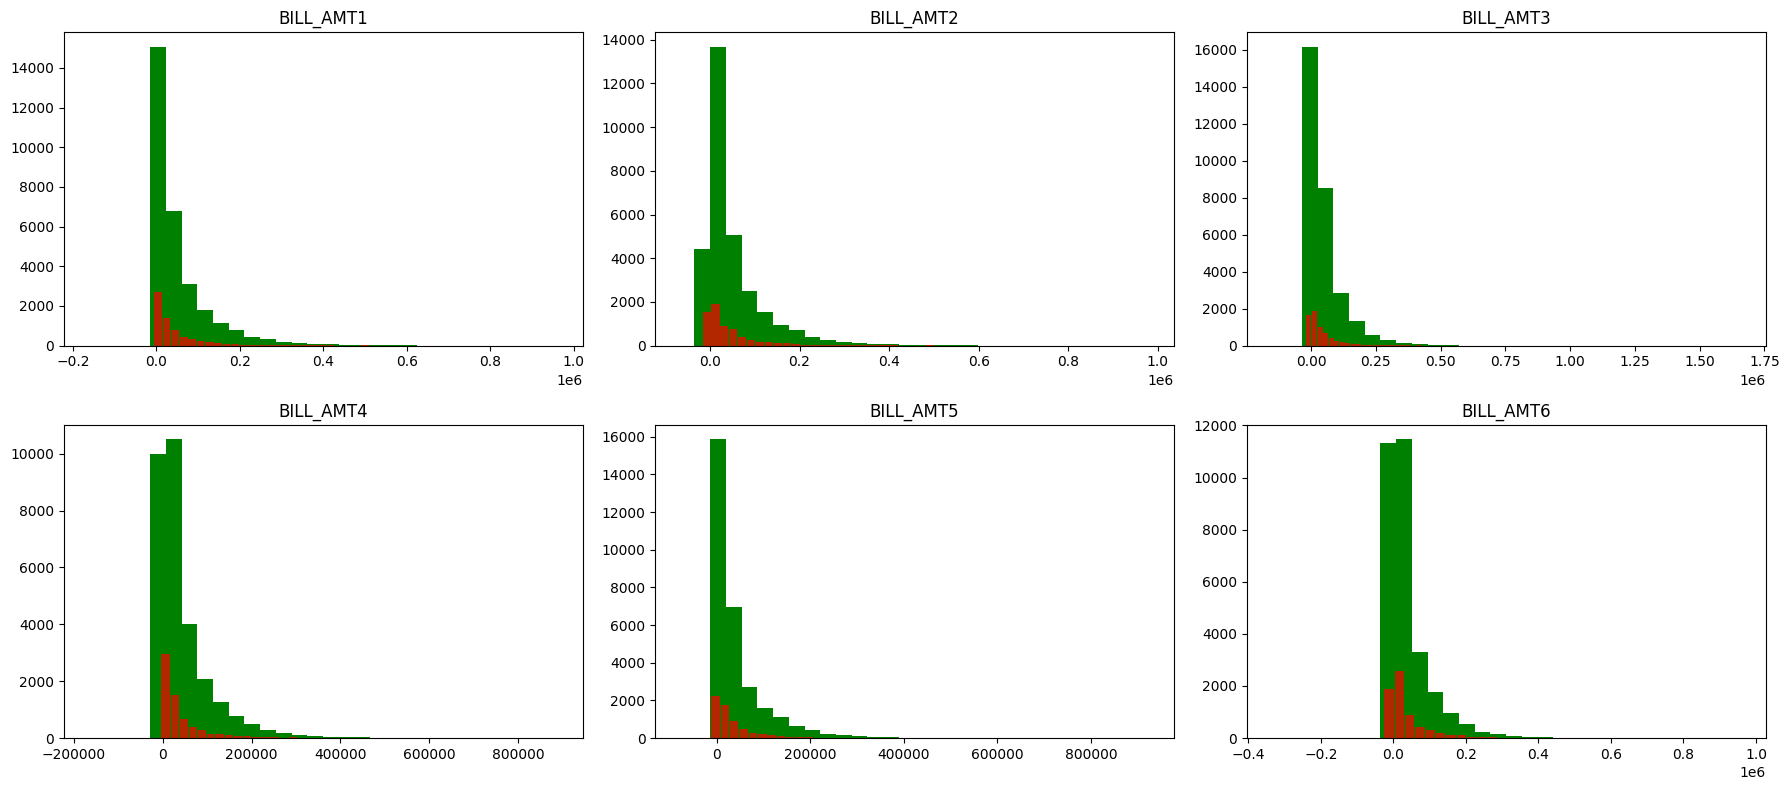

In [61]:
bill_amt_columns = PayColumnsNames('BILL_AMT')
figure, ax = plt.subplots(2,3)
figure.set_size_inches(18,8)


for i in range(len(pay_columns)):
    row,col = int(i/3), i%3

    ax[row,col].hist(credit_df[bill_amt_columns[i]], 30, color ='green')
    ax[row,col].hist(credit_df[bill_amt_columns[i]][(credit_df['defaulter']==1)],30,rwidth=0.9,color='red',alpha = 0.7)
    ax[row,col].set_title(bill_amt_columns[i])
    #adding scaling to make the graph more helpful
    #ax[row,col].set_yscale('log', nonposy='clip')



plt.tight_layout()
plt.show()

**The above histogram shows the distribution of Bill amount generated for each month explicitly for defaulters**

The green bins in the histograms shows the bill_amount for all the customers from September to April Month.

The red bins in the histogram tells the payment amount of customers who were actually a defaulter from September to April Month.

Above plot indicates that there is higher proportion of clients for whom the bill amount is high but payment done against the same is very low.

From the above plot , we can say that bill amount variable based on different months from April to September not able to give us a clear insight from the plot whether the customer will be defaulter or not compared to payment amount variable.

Hence payment amount features are more significant variables compared to the bill amount features.

##**BI-VARIATE ANALYSIS**

##Defaulter vs Sex

<Axes: xlabel='SEX', ylabel='count'>

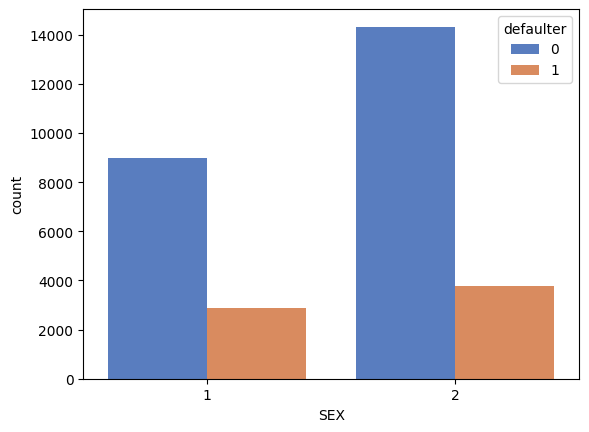

In [42]:
# Checking the number of counts of defaulters and non defaulters sex-wise


sns.countplot(x='SEX', data=credit_df,hue="defaulter", palette="muted")

In [ ]:
credit_df.loc[credit_df['SEX']==2,'defaulter'].value_counts()

0    14330
1     3761
Name: defaulter, dtype: int64

**It is evident from the above count plot output that males have overall less default payment rate w.r.t females**

**Both in Defaulter and Non-Defaults count, females were having higher proportion  (Sex=2)**

##Defaulter vs Education

<Axes: xlabel='EDUCATION', ylabel='count'>

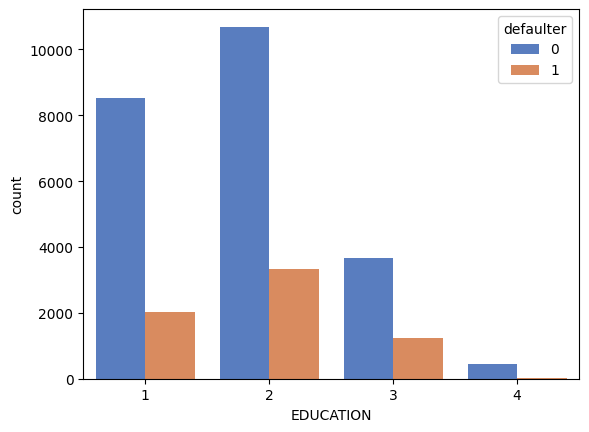

In [43]:
# Checking the number of counts of defaulters and non defaulters education-wise


sns.countplot(x='EDUCATION', data=credit_df,hue="defaulter", palette="muted")

In [ ]:
credit_df.loc[credit_df['EDUCATION']==2,'defaulter'].value_counts()

0    10691
1     3328
Name: defaulter, dtype: int64

**The credit card holders with a university degree were the customers with the highest number of default payment rate compared to other degree holders.**

##Defaulter vs Marriage

<Axes: xlabel='MARRIAGE', ylabel='count'>

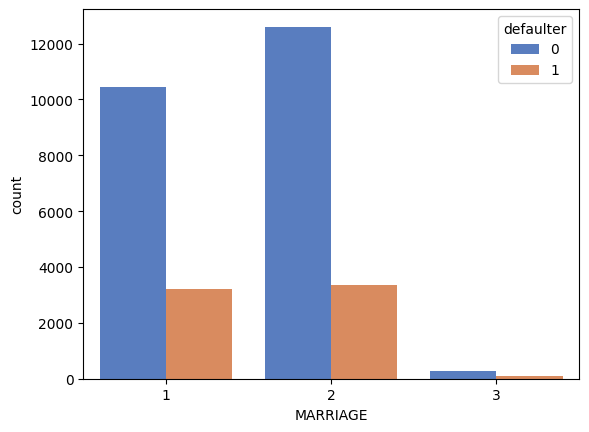

In [44]:
# Checking the number of counts of defaulters and non defaulters marriage-wise


sns.countplot(x='MARRIAGE', data=credit_df,hue="defaulter", palette="muted")

In [45]:
credit_df.loc[credit_df['MARRIAGE']==2,'defaulter'].value_counts()

,count
defaulter,
0,12605
1,3340


**It is evident from the above plot that both the credit card holders who were singles and married used to do default in payments.**

##Defaulter vs AGE

Text(0.5, 1.0, 'Distribution of Age')

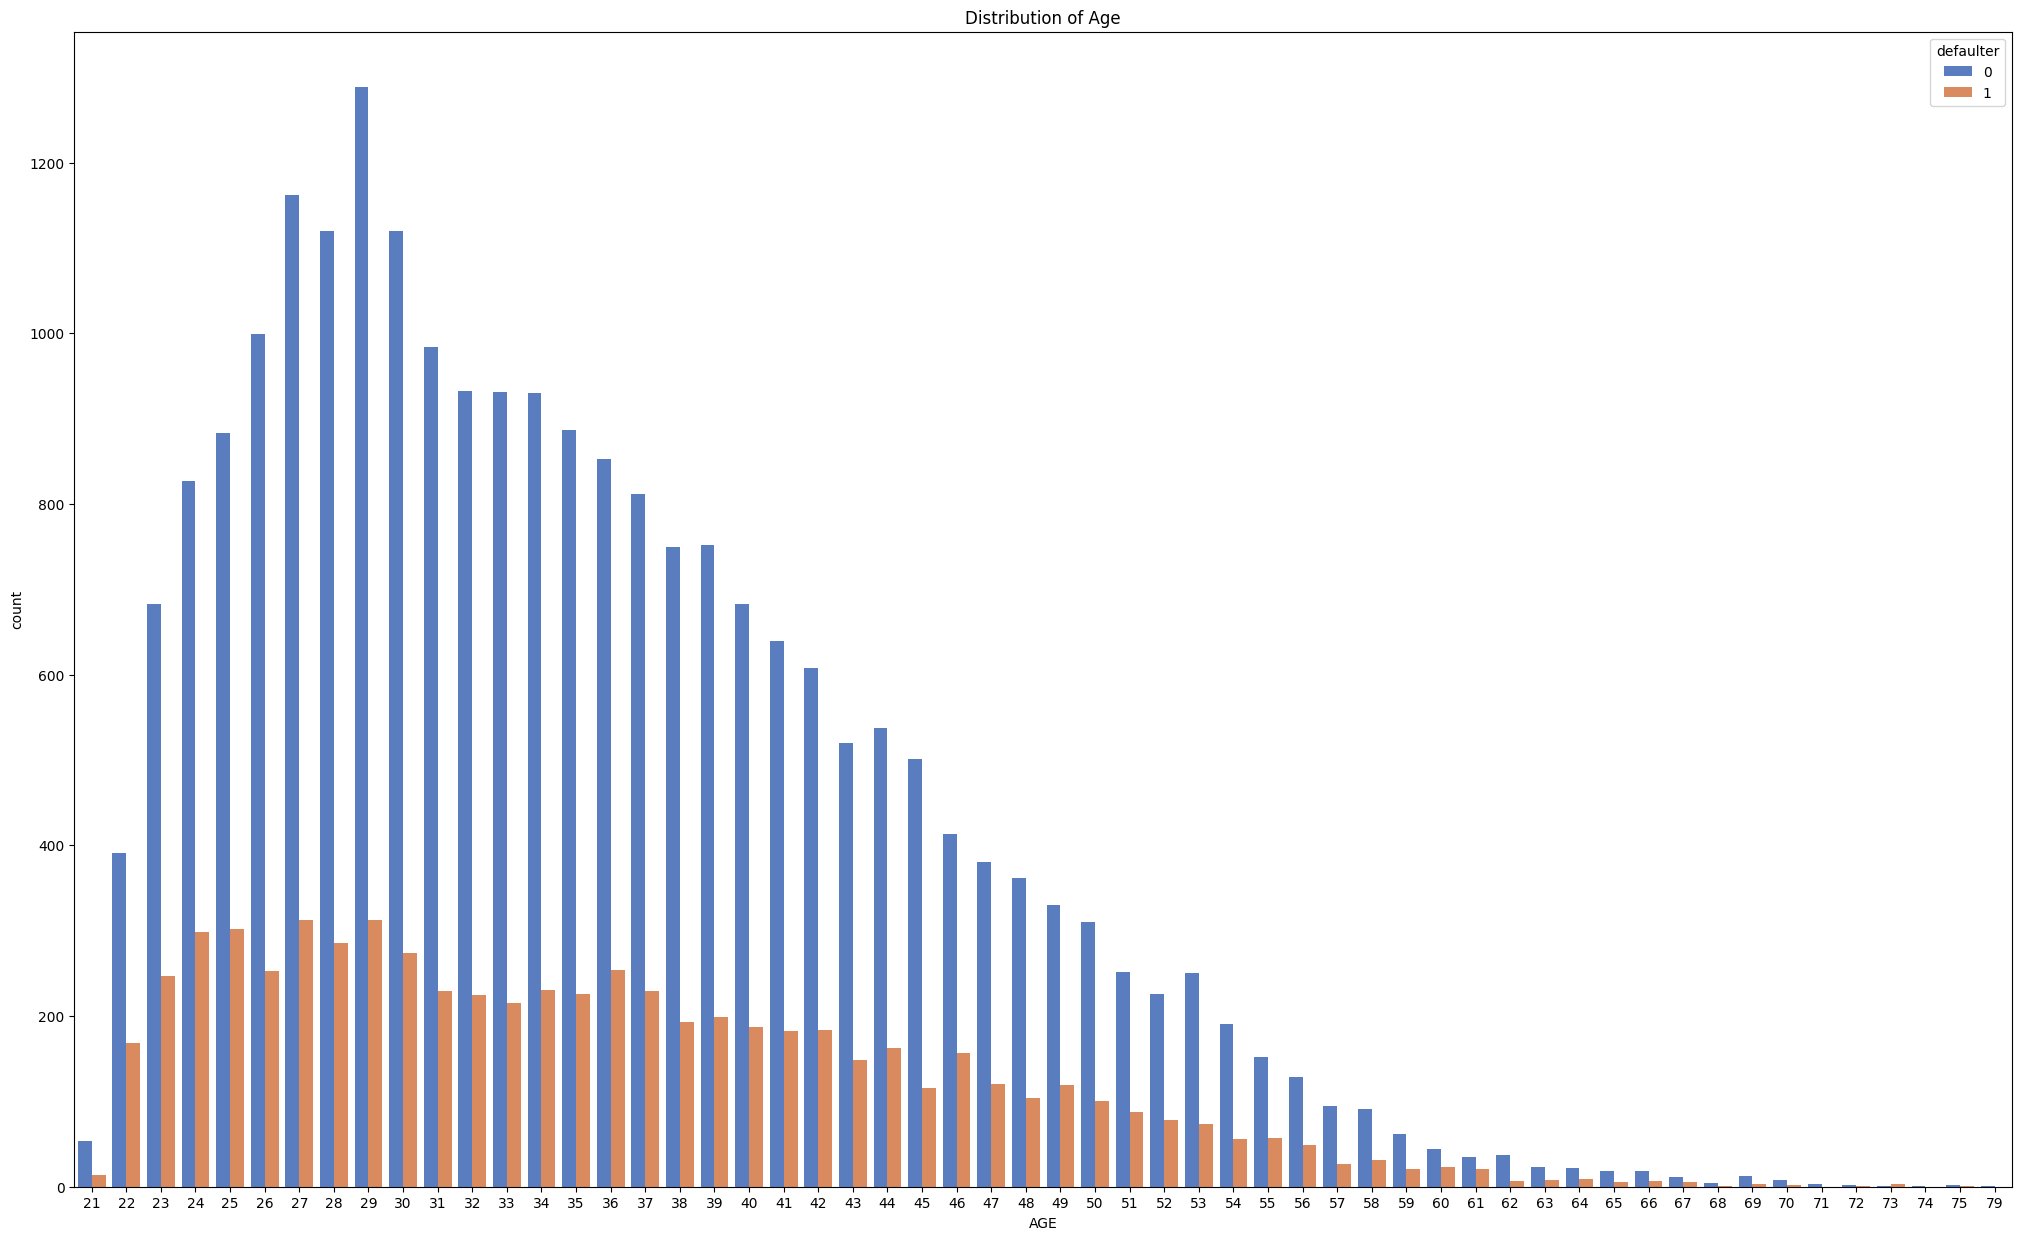

In [46]:
figure, ax = plt.subplots( figsize = (25,15))
sns.countplot(x='AGE', data=credit_df,hue="defaulter", palette="muted")
plt.title('Distribution of Age')

**We can say from the above graph that the young people between the age of 23 and 31 mostly default the credit card payment compared to older people.we can also see a similar trend of high default rate after the age of 60 in senior citizens as well.**

##**Multi-variate Analysis**

##SEX VS CREDIT LIMIT VS EDUCATION

Text(0.5, 1.0, 'Multivariate Analysis(Sex/Limit_Bal/Education')

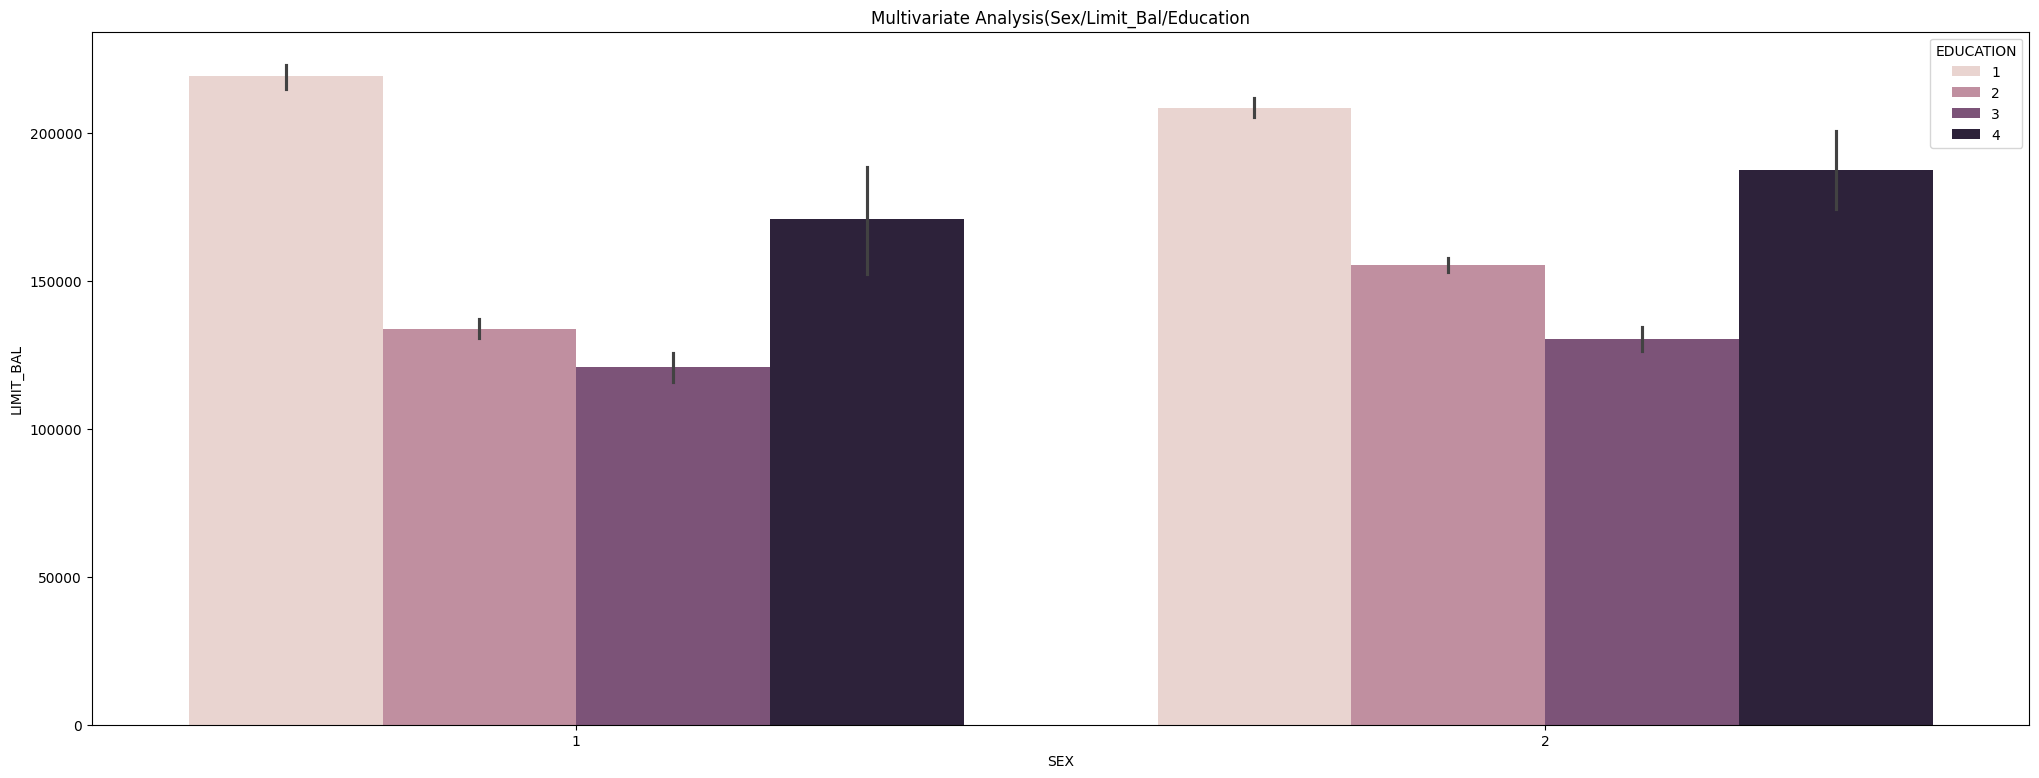

In [47]:
plt.figure(figsize=(25,9))
sns.barplot(x='SEX',y='LIMIT_BAL',data=credit_df,hue='EDUCATION')
plt.title('Multivariate Analysis(Sex/Limit_Bal/Education')

**The above figure tells us that  the highest LIMIT_BAL/credit limit amount is given to the graduate education credit card holders in both the sex.**

**On the contrary, the least credit limit amount is given to the high school education credit card holders in both the sex.**


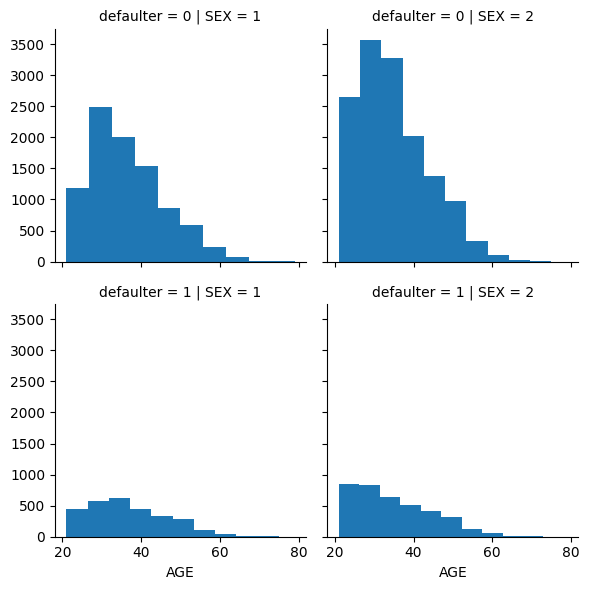

In [48]:
g = sns.FacetGrid(credit_df, row='defaulter', col='SEX')
g = g.map(plt.hist, 'AGE')

It can be seen that females of age group 20-30 have very high tendency to default payment compared to males in all age brackets. Hence we can keep the SEX column of clients to predict probability of defaulting payment.


# **Heat Map**

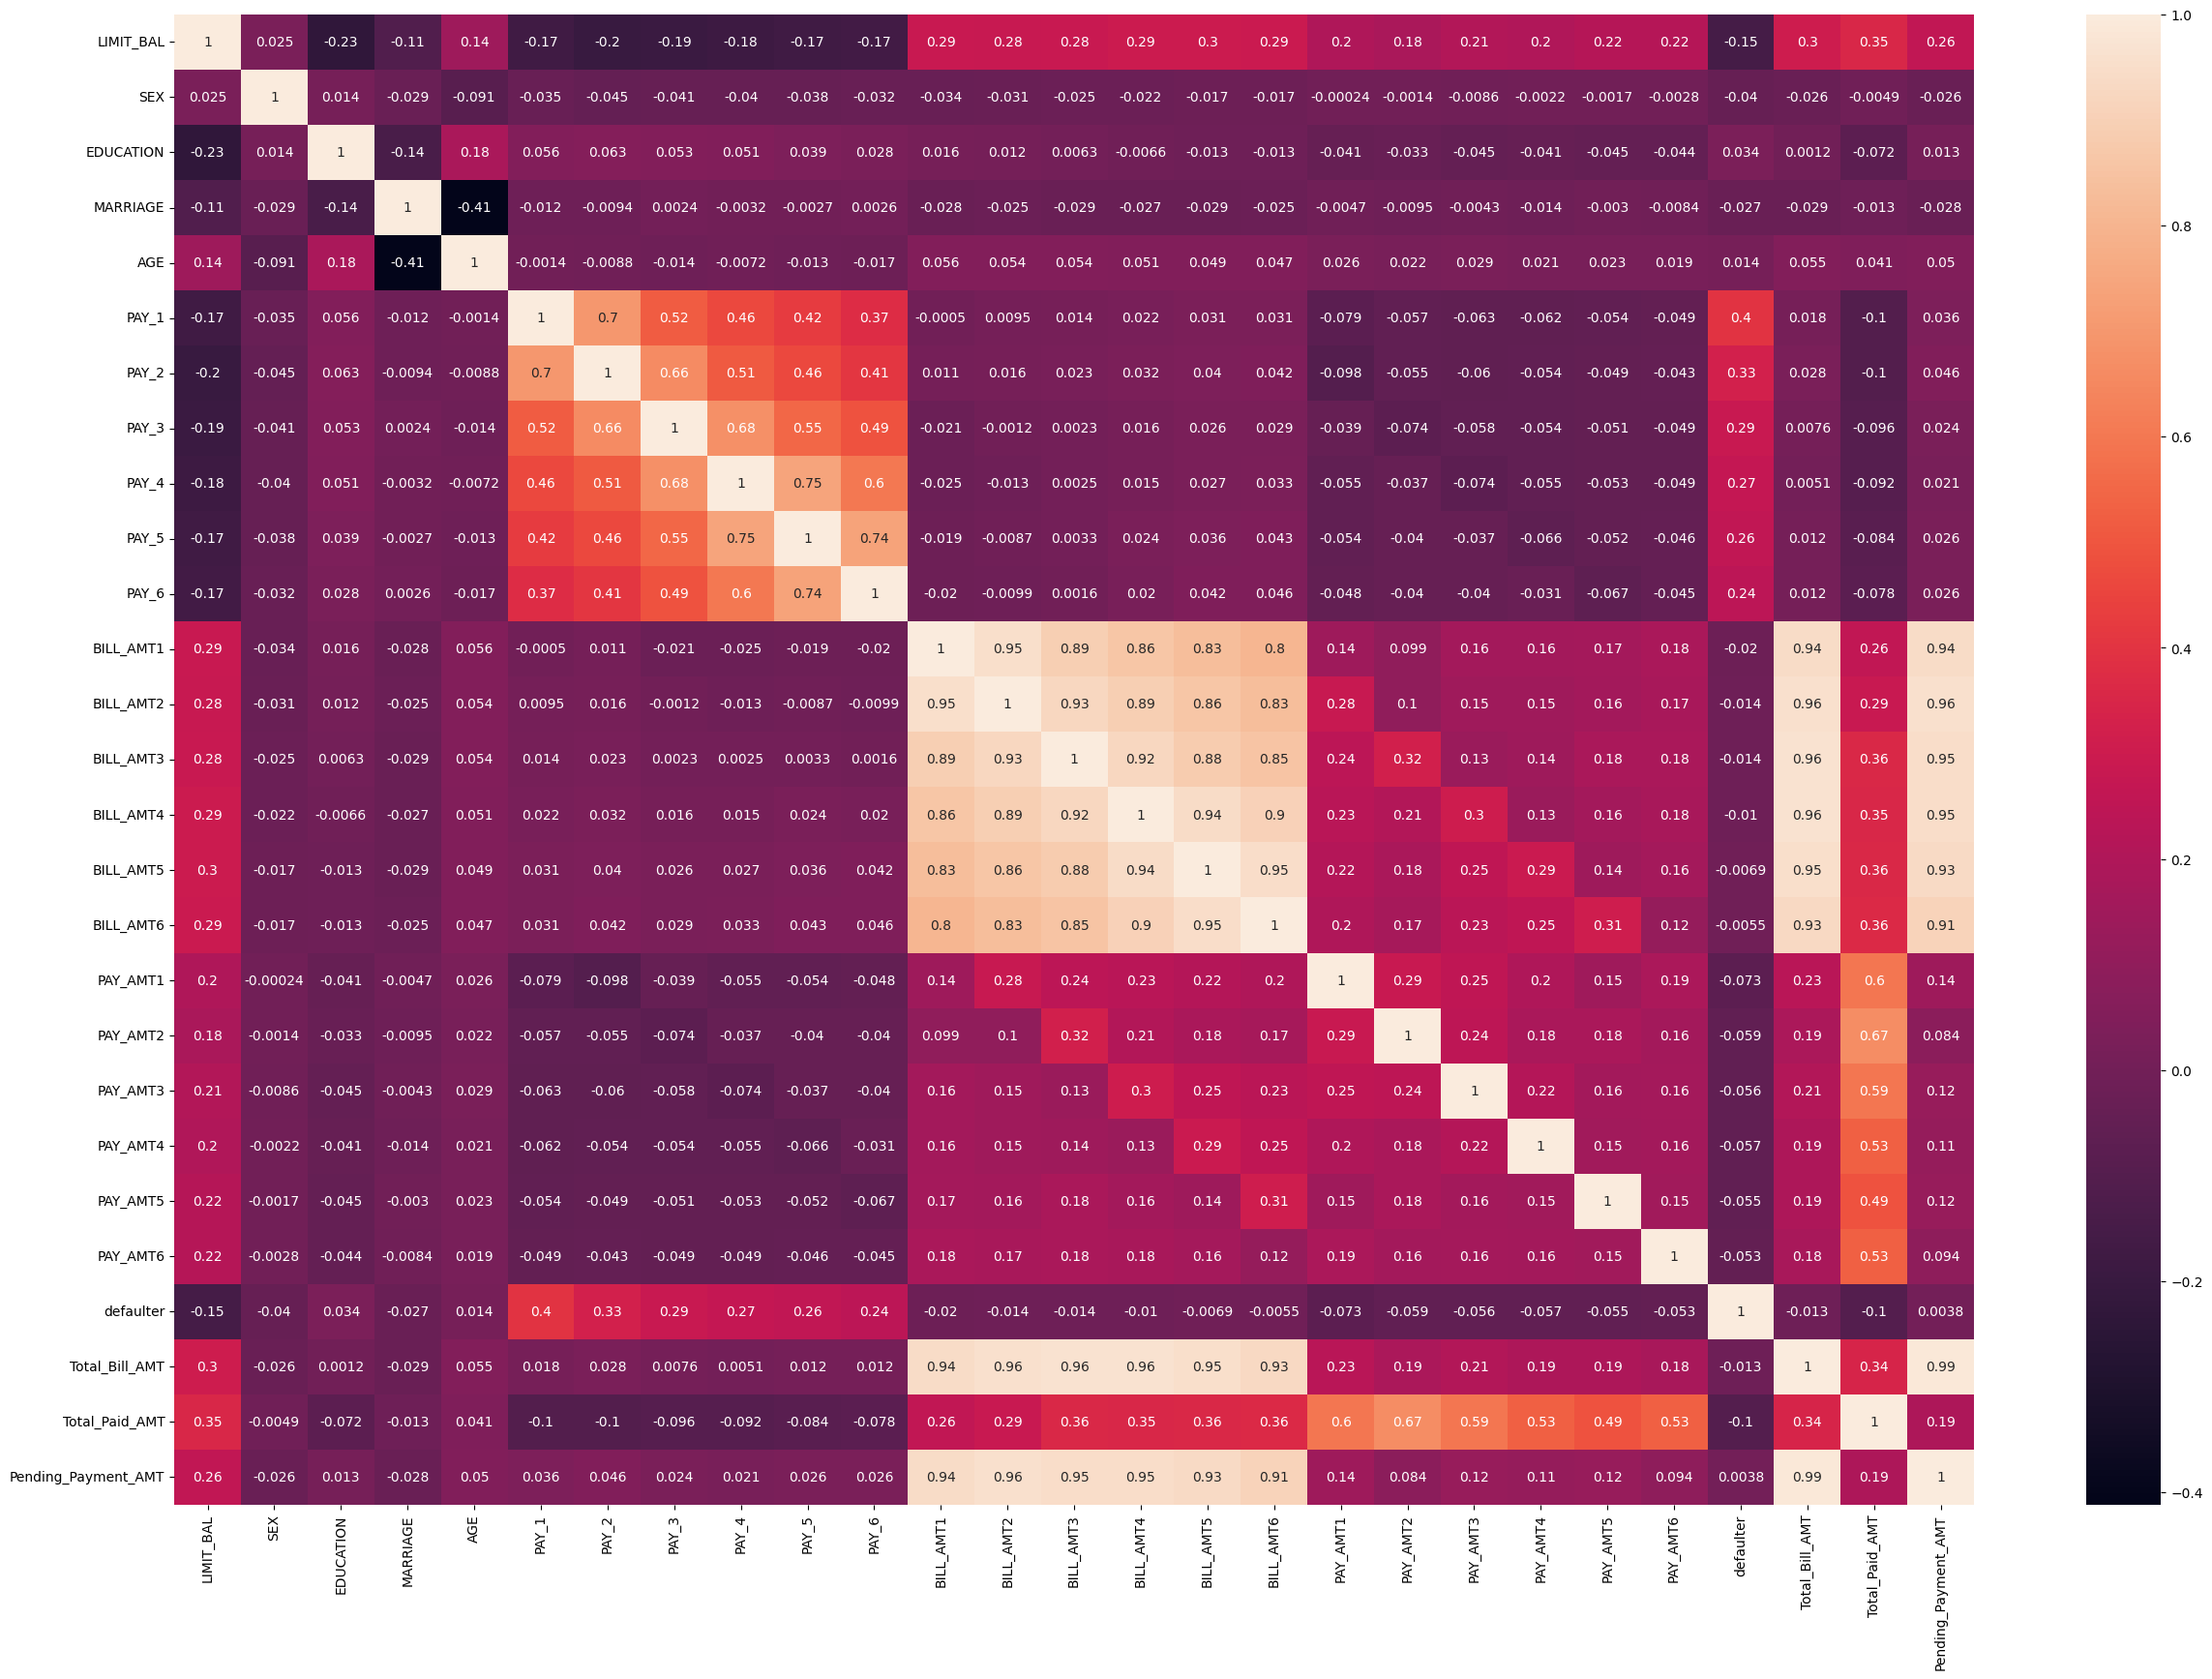

In [49]:
plt.subplots(figsize=(30,20))
sns.heatmap(credit_df.corr(), annot=True)
plt.show()

## The above heatmap clearly tells you that the PAY_1 to PAY_6 variables are the strongest predictors of defaulter which are postively correlated with the target variable.

## Hence we can conclude from the above heatmap that the most important feature infulencing our target feature will be Pay_1 to Pay_6. But there is multicollinearity between the Payment Repayment Status features.

## The LIMIT_BAL and PAY_AMT_1 to PAY_AMT_6 variables showing a negative correlation with the target variable defaulter

## Apart from that,we can find a positive correlation among the features LIMIT_BAL and BILL_AMT

## A negative correlation between AGE and MARRIAGE

## We will first train model wil all the features and try reducing the non-important features.

#**Outliers**

In [50]:
# find Numerical variables
numerical = [var for var in credit_df.columns if credit_df[var].dtype !='O']
print('There are {} numerical variables'.format(len(numerical)))

There are 27 numerical variables


In [51]:
discrete = []
for var in numerical:
    if len(credit_df[var].unique())<20:
        print(var, ' values: ', credit_df[var].unique())
        discrete.append(var)

print('There are {} discrete variables'.format(len(discrete)))

SEX  values:  [2 1]
EDUCATION  values:  [2 1 3 4]
MARRIAGE  values:  [1 2 3]
PAY_1  values:  [2 0 1 3 4 8 7 5 6]
PAY_2  values:  [2 0 3 5 7 4 1 6 8]
PAY_3  values:  [0 2 3 4 6 7 1 5 8]
PAY_4  values:  [0 2 3 4 5 7 6 1 8]
PAY_5  values:  [0 2 3 5 4 7 8 6]
PAY_6  values:  [0 2 3 6 4 7 8 5]
defaulter  values:  [1 0]
There are 10 discrete variables


In [60]:
# outliers in discrete variables
#for var in discrete:
   # print(credit_df[var].value_counts() / np.float(len(credit_df)))
    #print()

**Plotting outliers in discrete variables**

<ipython-input-53-41f51990f77f>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='defaulter',y='AGE',data=credit_df,palette='rainbow')


<Axes: xlabel='defaulter', ylabel='AGE'>

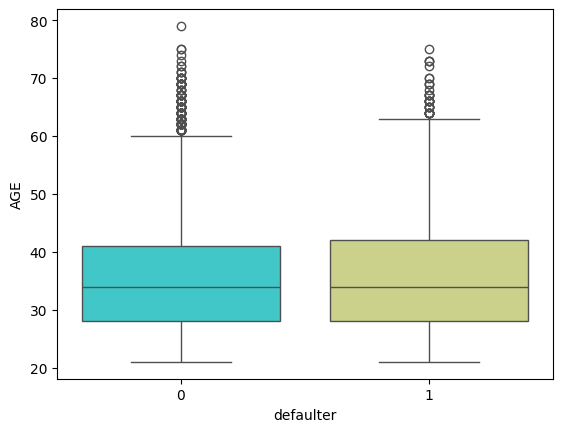

In [53]:
sns.boxplot(x='defaulter',y='AGE',data=credit_df,palette='rainbow')

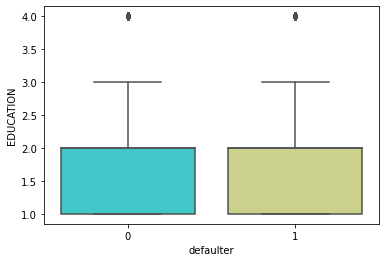

In [ ]:
sns.boxplot(x='defaulter',y='EDUCATION',data=credit_df,palette='rainbow')

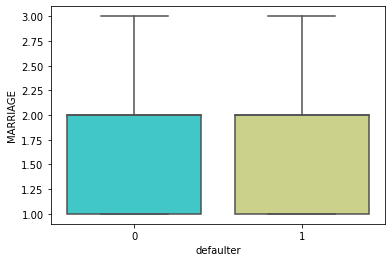

In [ ]:
sns.boxplot(x='defaulter',y='MARRIAGE',data=credit_df,palette='rainbow')

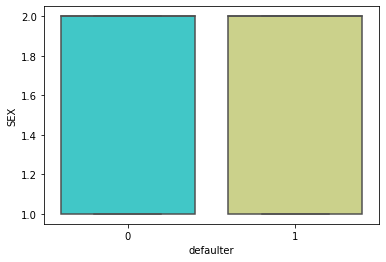

In [ ]:
sns.boxplot(x='defaulter',y='SEX',data=credit_df,palette='rainbow')

<Axes: xlabel='SEX', ylabel='AGE'>

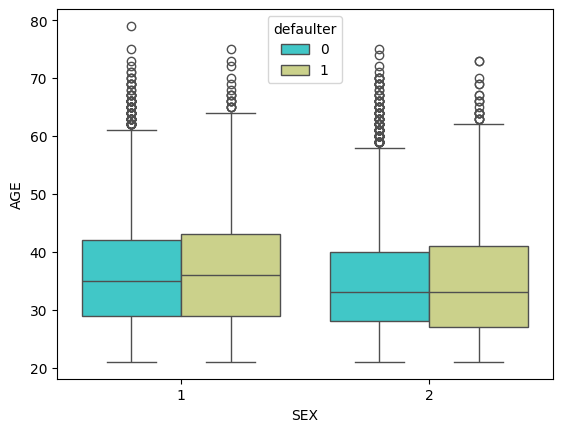

In [54]:
sns.boxplot(x='SEX',hue='defaulter', y='AGE',data=credit_df,palette="rainbow")

<Axes: xlabel='MARRIAGE', ylabel='AGE'>

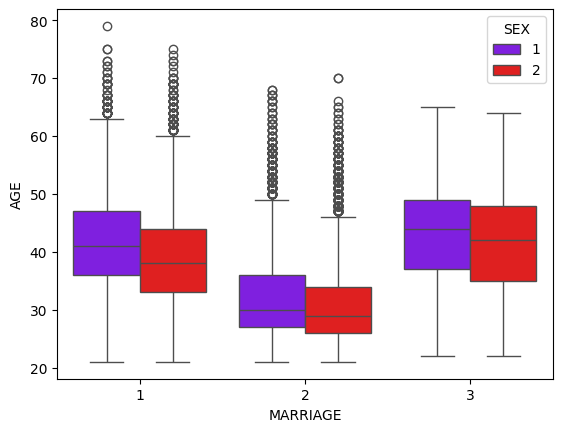

In [55]:
sns.boxplot(x='MARRIAGE',hue='SEX', y='AGE',data=credit_df,palette="rainbow" )

Marriage, age, and sex. The dataset mostly contains couples in their mid-30s to mid-40s and single people in their mid-20s to early-30s.

<Axes: xlabel='MARRIAGE', ylabel='AGE'>

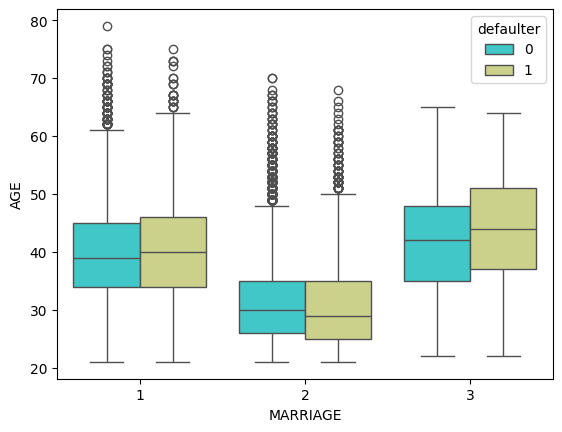

In [56]:
sns.boxplot(x='MARRIAGE',hue='defaulter', y='AGE',data=credit_df,palette="rainbow")